<center><h3>Capstone Project - Workplace Absenteeism</h3>
Sara Maxwell<br>
November 12, 2018</center>

<h1>1. INTRODUCTION</h1>
Absenteeism is the practice of regularly being absent from work. While employers expect employees to miss some days of work, excessive absenteeism can hurt productivity and the company's bottom line. If employers are more aware of the causes of absenteeism, they are likelier to take steps to alleviate the problems. The goal of this project is to determine the most common causes of absenteeism.<br><br>

The main clients for this analysis are:

* Business owners and managers: This data can help owners and managers take steps to improve their workplace environments.
* Employees: This data can help workers take steps to make lifestyle changes that could reduce their amount of time spent away from work.
* Public health officials: This data can help public officials make the general public more aware of the problem of workplace absenteeism and enact changes that could help businesses improve their workplace environments.

<h1>2. ABOUT THE DATA</h1>
The data comes from the Machine Learning Repository at the University of California, Irvine, updated April 5, 2018. This data set contains 740 records of absenteeism at work from July 2007 to July 2010 at a Brazilian courier company, in 21 columns. This dataset was accessed from [http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work]. These are the factors of interest:

* Reason for absence - absences recognized by the International Code of Diseases (21) and not recognized by ICD (7).
* Day of the week
* Season
* Month of absence
* Transportation expense
* Distance from Residence to Work
* Service time
* Age
* Disciplinary failure (binary with 1 for yes and 0 for no)
* Education level
* Number of children
* Social drinker (binary)
* Social smoker (binary)
* Number of pets
* Weight
* Height
* Body mass index
* Number of hours absent

<h1>3. DATA WRANGLING</h1>
* The data is clean, so I made binary columns for regression analysis using one-hot encoding for 'Reason', 'Month of absence', 'Day of the week','Seasons', 'Disciplinary failure', 'Education', 'Social drinker', and 'Social smoker'.
* I also renamed the new columns from the one-hot encoding and made the existing columns easier to understand. 
* The 'Absenteeism Time in Hours' is positively skewed, with the maximum value about two orders of magnitude higher than most values, so I added a new column with the hours absent logarithmically transformed. I also replaced the '-inf' values with zeroes.

In [1]:
# import modules
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
# read dataset 'absenteeism at work'
absenteeism_data = pd.read_csv('Absenteeism_at_work.csv', delimiter = ';')

In [3]:
one_hot_columns = ['Reason for absence', 'Month of absence', 'Day of the week','Seasons', 'Disciplinary failure',
                  'Education', 'Social drinker', 'Social smoker']

In [4]:
# Convert the data to strings for the one-hot encoding to work

foo = lambda x: str(x)
one_hot_data = absenteeism_data[one_hot_columns].copy()
print(one_hot_data.shape)

for C in one_hot_data.columns:
    one_hot_data[C]= one_hot_data[C].apply(foo)
    
one_hot_data = pd.get_dummies(one_hot_data)
absenteeism_cleaned = one_hot_data.merge(absenteeism_data, left_index=True, right_index=True)

(740, 8)


In [5]:
#Logarithmic transformation of hours absent
absenteeism_cleaned['Hours_Norm'] = np.log(absenteeism_cleaned['Absenteeism time in hours'])

#Workaround of -inf in cells with zero hours
absenteeism_cleaned['Hours_Norm'][absenteeism_cleaned['Hours_Norm']==-np.inf]=0

C:\Users\saraa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\saraa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [6]:
#2. Change columns to make them easier to understand.
absenteeism_cleaned = absenteeism_cleaned.rename({'Reason for absence_0':'Unknown','Reason for absence_1':'Infectious',
                      'Reason for absence_2':'Neoplasms','Reason for absence_3':'Blood_or_Immune','Reason for absence_4':'Endocrine',
                      'Reason for absence_5':'Mental','Reason for absence_6':'Nervous_system','Reason for absence_7':'Eye',
                      'Reason for absence_8':'Ear','Reason for absence_9':'Circulatory','Reason for absence_10':'Respiratory',
                      'Reason for absence_11':'Digestive','Reason for absence_12':'Skin','Reason for absence_13':'Musculoskeletal',
                      'Reason for absence_14':'Genitourinary','Reason for absence_15':'Pregnancy','Reason for absence_16':'Perinatal',
                      'Reason for absence_17':'Congenital','Reason for absence_18':'Other','Reason for absence_19':'Injury',
                      'Reason for absence_20':'External_causes','Reason for absence_21':'Contact_with_services',
                      'Reason for absence_22':'Follow_Up','Reason for absence_23':'Consultation',
                      'Reason for absence_24':'Blood_donation','Reason for absence_25':'Lab_exam',
                      'Reason for absence_26':'Unjustified','Reason for absence_27':'Physiotherapy',
                      'Reason for absence_28':'Dental','Month of absence_0':'No_absence', 'Month of absence_1':'January',
                      'Month of absence_10':'October', 'Month of absence_11':'November','Month of absence_12':'December',
                      'Month of absence_2':'February','Month of absence_3':'March', 'Month of absence_4':'April',
                      'Month of absence_5':'May', 'Month of absence_6':'June','Month of absence_7':'July',
                      'Month of absence_8':'August','Month of absence_9':'September', 'Day of the week_2':'Monday',
                      'Day of the week_3':'Tuesday', 'Day of the week_4':'Wednesday','Day of the week_5':'Thursday',
                      'Day of the week_6':'Friday','Seasons_1':'Winter', 'Seasons_2':'Summer', 'Seasons_3':'Fall',
                      'Seasons_4':'Spring','Disciplinary failure_0':'No_Disciplinary_failure',
                      'Disciplinary failure_1':'Disciplinary_failure', 'Education_1':'High_school','Education_2':'Graduate',
                      'Education_3':'Postgraduate','Education_4':'Master_and_Doctor', 'Son_0':'No_children', 'Son_1':'1_child',
                      'Son_2':'2_children', 'Son_3':'3_children', 'Son_4':'4_children','Pet_0':'No_pets', 'Pet_1':'1_pet',
                      'Pet_2':'2_pets', 'Pet_4':'4_pets','Pet_5':'5_pets', 'Pet_8':'8_pets', 'Social drinker_0':'Nondrinker',
                      'Social drinker_1':'Drinker', 'Social smoker_0':'Nonsmoker','Social smoker_1':'Smoker',
                      'Reason for absence':'Reason_for_absence','Month of absence':'Month_of_absence',
                      'Day of the week':'Day_of_the_week','Transportation expense':'Transportation_expense_(R$)',
                      'Distance from Residence to Work':'Distance_from_Residence_to_Work_(km)','Service time':'Service_time_(years)',
                      'Age':'Age_(years)', 'Work load Average/day ':'Workload_avg/day','Hit target':'Hit_target', 'Son':'Children',
                      'Pet':'Pets', 'Weight':'Weight_(kg)', 'Height':'Height_(cm)', 'Body mass index':'Body_mass_index',
                      'Absenteeism time in hours':'Hours_Absent'}, axis='columns')

In [7]:
absenteeism_cleaned.Day_of_the_week = absenteeism_cleaned.Day_of_the_week.replace({2:0})

In [8]:
absenteeism_cleaned.Day_of_the_week = absenteeism_cleaned.Day_of_the_week.replace({3:1})

In [9]:
absenteeism_cleaned.Day_of_the_week = absenteeism_cleaned.Day_of_the_week.replace({4:2})

In [10]:
absenteeism_cleaned.Day_of_the_week = absenteeism_cleaned.Day_of_the_week.replace({5:3})

In [11]:
absenteeism_cleaned.Day_of_the_week = absenteeism_cleaned.Day_of_the_week.replace({6:4})

In [12]:
absenteeism_cleaned.Seasons = absenteeism_cleaned.Seasons.replace({1:0})

In [13]:
absenteeism_cleaned.Seasons = absenteeism_cleaned.Seasons.replace({2:1})

In [14]:
absenteeism_cleaned.Seasons = absenteeism_cleaned.Seasons.replace({3:2})

In [15]:
absenteeism_cleaned.Seasons = absenteeism_cleaned.Seasons.replace({4:3})

In [16]:
absenteeism_cleaned.Education = absenteeism_cleaned.Education.replace({1:0})

In [17]:
absenteeism_cleaned.Education = absenteeism_cleaned.Education.replace({2:1})

In [18]:
absenteeism_cleaned.Education = absenteeism_cleaned.Education.replace({3:2})

In [19]:
absenteeism_cleaned.Education = absenteeism_cleaned.Education.replace({4:3})

In [20]:
absenteeism_cleaned.to_csv("absenteeism_cleaned.csv", sep=';',index=False)

<h1>4. INFERENTIAL STATISTICS</h1>
First I calculated the percentage of total hours missed for each reason.

In [21]:
import scipy.stats as sp
import matplotlib.mlab as mlab

from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Import cleaned data
abs_data = pd.read_csv('absenteeism_cleaned.csv', delimiter = ';');

#Calculate total hours absent
lost_hours = abs_data['Hours_Absent'].values.sum()

<h2>4.1. Reasons</h2>
Musculoskeletal issues and injuries had the highest percentages at about 16% and 14% respectively. Since courier work involves transporting goods, these jobs often involve a lot of heavy lifting, so there is a greater likelihood of employees taking time off work for injuries or musculoskeletal issues.

In [22]:
#Reason 20, 'External_causes', has no entries and is excluded

reasons = ['Unknown','Infectious','Neoplasms','Blood_or_Immune','Endocrine','Mental',
           'Nervous_system', 'Eye','Ear','Circulatory','Respiratory','Digestive','Skin',
           'Musculoskeletal','Genitourinary','Pregnancy','Perinatal','Congenital','Other',
           'Injury','Contact_with_services','Follow_Up','Consultation',
           'Blood_donation','Lab_exam','Unjustified','Physiotherapy','Dental']

by_reason = []

for R in reasons:
    lost_hours_reason = abs_data[abs_data[R] != 0]['Reason_for_absence'].values.sum()
    x = np.round( 100*lost_hours_reason/lost_hours  , 3)
    
    by_reason.append(x)

pd.DataFrame(by_reason, columns=['Total Lost %'], index = reasons)

,Total Lost %
Unknown,0.000
Infectious,0.312
Neoplasms,0.039
Blood_or_Immune,0.059
Endocrine,0.156
Mental,0.293
Nervous_system,0.937
Eye,2.049
Ear,0.937
Circulatory,0.703


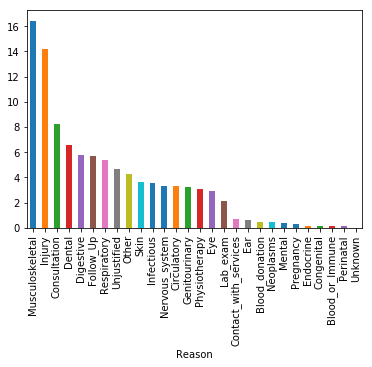

In [23]:
reasons = ['Unknown','Infectious','Neoplasms','Blood_or_Immune','Endocrine','Mental',
           'Nervous_system', 'Eye','Ear','Circulatory','Respiratory','Digestive','Skin',
           'Musculoskeletal','Genitourinary','Pregnancy','Perinatal','Congenital','Other',
           'Injury','External','Contact_with_services','Follow_Up','Consultation',
           'Blood_donation','Lab_exam','Unjustified','Physiotherapy','Dental']

abs_data['Reason'] = abs_data.Reason_for_absence.replace(np.arange(len(reasons)), reasons)

pct_by_reason = 100 * abs_data.groupby('Reason').sum()['Hours_Absent'] / lost_hours
pct_by_reason.sort_values(ascending=False).plot.bar()

<h2>4.2. Months</h2>
Among the percentages missed for each month, March and July have higher percentages than the others. July is near the beginning of winter, so I would expect employees to miss work due to illnesses such as colds and the flu. March is late summer/early fall and comes just after the beginning of the school year, so parents would take time off for kids' school activities.

In [24]:
months = ['No_absence', 'January','February','March','April','May','June','July','August',
          'September', 'October', 'November', 'December']
by_month = []
## Use a loop (not very efficient)
for M in months:
    lost_hours_month = abs_data[abs_data[M] != 0]['Hours_Absent'].values.sum()
    x = np.round( 100*lost_hours_month/lost_hours  , 3)
    
    by_month.append(x)

pd.DataFrame(by_month, columns=['Total Lost %'], index = months)

,Total Lost %
No_absence,0.000
January,4.333
February,5.738
March,14.930
April,9.407
May,7.806
June,8.021
July,14.325
August,5.621
September,5.699


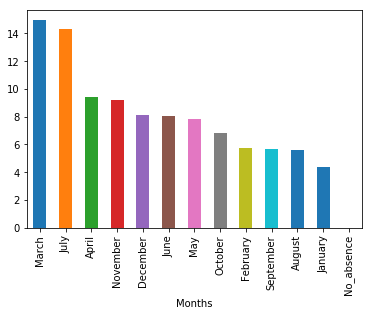

In [25]:
abs_data['Months'] = abs_data.Month_of_absence.replace(np.arange(len(months)), months)

pct_by_month = 100 * abs_data.groupby('Months').sum()['Hours_Absent'] / lost_hours
pct_by_month

pct_by_month.sort_values(ascending=False).plot.bar()

<h2>4.3. Days of the Week</h2>
Looking at the days of the week, Monday has a higher percentage of hours missed, likely from workers recovering from the weekend.

In [26]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
by_day = []
## Use a loop (not very efficient)
for D in days:
    lost_hours_day = abs_data[abs_data[D] != 0]['Hours_Absent'].values.sum()
    x = np.round( 100*lost_hours_day/lost_hours  , 3)
    
    by_day.append(x)

pd.DataFrame(by_day, columns=['Total Lost %'], index = days)

,Total Lost %
Monday,29.059
Tuesday,23.985
Wednesday,21.760
Thursday,10.792
Friday,14.403


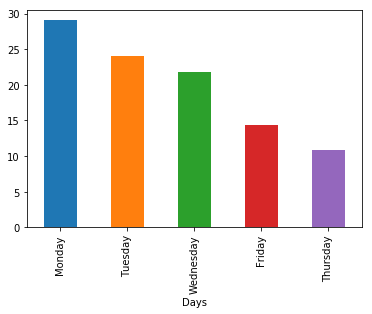

In [27]:
abs_data['Days'] = abs_data.Day_of_the_week.replace(np.arange(len(days)), days)
abs_data['Days']
pct_by_day = 100 * abs_data.groupby('Days').sum()['Hours_Absent'] / lost_hours
pct_by_day.sort_values(ascending=False).plot.bar()

<h2>4.4 Seasons</h2>
For the seasons, at a glance they have similar percentages, though fall stands out a little more, probably due to illnesses such as colds and the flu.

In [28]:
seasons = ['Spring','Summer','Fall','Winter']
by_season = []
## Use a loop (not very efficient)
for S in seasons:
    lost_hours_season = abs_data[abs_data[S] != 0]['Hours_Absent'].values.sum()
    x = np.round( 100*lost_hours_season/lost_hours  , 3)
    
    by_season.append(x)

pd.DataFrame(by_season, columns=['Total Lost %'], index = seasons)

,Total Lost %
Spring,24.180
Summer,22.482
Fall,29.118
Winter,24.219


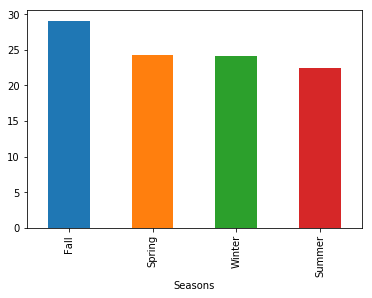

In [29]:
abs_data['Seasons'] = abs_data.Seasons.replace(np.arange(len(seasons)), seasons)

pct_by_season = 100 * abs_data.groupby('Seasons').sum()['Hours_Absent'] / lost_hours
pct_by_season.sort_values(ascending=False).plot.bar()

<h2>4.5. Education</h2>
In the different education levels, the overwhelming percentage of hours missed came from employees with just a high school education. Courier work doesn't seem to be very high-skilled or require schooling beyond high school. Workers with a high school diploma are likelier to do the physical work and take time off for injuries and musculoskeletal issues. Workers with college degrees are likelier to do white-collar managerial work and seem far less likely to need time off due to illness or injury.

In [30]:
education = ['High_school', 'Graduate', 'Postgraduate', 'Master_and_Doctor']
by_education = []
## Use a loop (not very efficient)
for E in education:
    lost_hours_education = abs_data[abs_data[E] != 0]['Hours_Absent'].values.sum()
    x = np.round( 100*lost_hours_education/lost_hours  , 3)
    
    by_education.append(x)

pd.DataFrame(by_education, columns=['Total Lost %'], index = education)

,Total Lost %
High_school,85.734
Graduate,5.738
Postgraduate,8.119
Master_and_Doctor,0.410


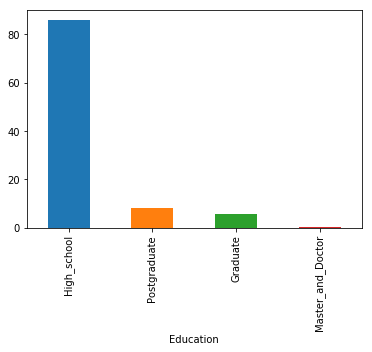

In [31]:
abs_data['Education'] = abs_data.Education.replace(np.arange(len(education)), education)

pct_by_education = 100 * abs_data.groupby('Education').sum()['Hours_Absent'] / lost_hours
pct_by_education.sort_values(ascending=False).plot.bar()

<h2>4.6. Binary Categories</h2>
Next, I looked at the binary categories. None of the employees with disciplinary failures missed work. Social smokers took a fairly small amount of time off, while social drinkers took almost twice as much time off as non-drinkers.

In [32]:
lost_hours_dis = abs_data[abs_data.Disciplinary_failure != 0]
lost_hours_dis_pct = lost_hours_dis['Hours_Absent'].values.sum()/lost_hours

lost_hours_nodis = abs_data[abs_data.No_Disciplinary_failure != 0]
lost_hours_nodis_pct = lost_hours_nodis['Hours_Absent'].values.sum()/lost_hours

print ('Disciplinary failure:','{percent:.2%}'.format(percent=lost_hours_dis_pct))
print ('No disciplinary failure:','{percent:.2%}'.format(percent=lost_hours_nodis_pct))

lost_hours_smoker = abs_data[abs_data.Smoker != 0]
lost_hours_smoker_pct = lost_hours_smoker['Hours_Absent'].values.sum()/lost_hours

lost_hours_nonsmoker = abs_data[abs_data.Nonsmoker != 0]
lost_hours_nonsmoker_pct = lost_hours_nonsmoker['Hours_Absent'].values.sum()/lost_hours

print ('Smoker:','{percent:.2%}'.format(percent=lost_hours_smoker_pct))
print ('Nonsmoker:','{percent:.2%}'.format(percent=lost_hours_nonsmoker_pct))

lost_hours_drinker = abs_data[abs_data.Drinker != 0]
lost_hours_drinker_pct = lost_hours_drinker['Hours_Absent'].values.sum()/lost_hours

lost_hours_nondrinker = abs_data[abs_data.Nondrinker != 0]
lost_hours_nondrinker_pct = lost_hours_nondrinker['Hours_Absent'].values.sum()/lost_hours

print ('Drinker:','{percent:.2%}'.format(percent=lost_hours_drinker_pct))
print ('Nondrinker:','{percent:.2%}'.format(percent=lost_hours_nondrinker_pct))

Disciplinary failure: 0.00%
No disciplinary failure: 100.00%
Smoker: 6.85%
Nonsmoker: 93.15%
Drinker: 62.96%
Nondrinker: 37.04%


<h2>4.7. Correlation Values</h2>
After examining this data, I calculated the correlation values between hours missed and transportation expense, commuting distance, service time, age, height, weight, and body mass index (BMI). Transportation expense, service time, age, and weight had very weak correlations. Height had a slightly stronger correlation. Commuting distance and BMI had very weak negative correlations.

In [33]:
# define variables
var = ['Hours_Absent','Transportation_expense_(R$)', 'Distance_from_Residence_to_Work_(km)','Service_time_(years)',
      'Age_(years)','Body_mass_index']

# digital correlation matrix
abs_data[var].corr()

,Hours_Absent,Transportation_expense_(R$),Distance_from_Residence_to_Work_(km),Service_time_(years),Age_(years),Body_mass_index
Hours_Absent,1.000000,0.027585,-0.088363,0.019029,0.065760,-0.049719
Transportation_expense_(R$),0.027585,1.000000,0.262183,-0.349887,-0.227542,-0.136517
Distance_from_Residence_to_Work_(km),-0.088363,0.262183,1.000000,0.131730,-0.145886,0.113772
Service_time_(years),0.019029,-0.349887,0.131730,1.000000,0.670979,0.499718
Age_(years),0.065760,-0.227542,-0.145886,0.670979,1.000000,0.470688
Body_mass_index,-0.049719,-0.136517,0.113772,0.499718,0.470688,1.000000


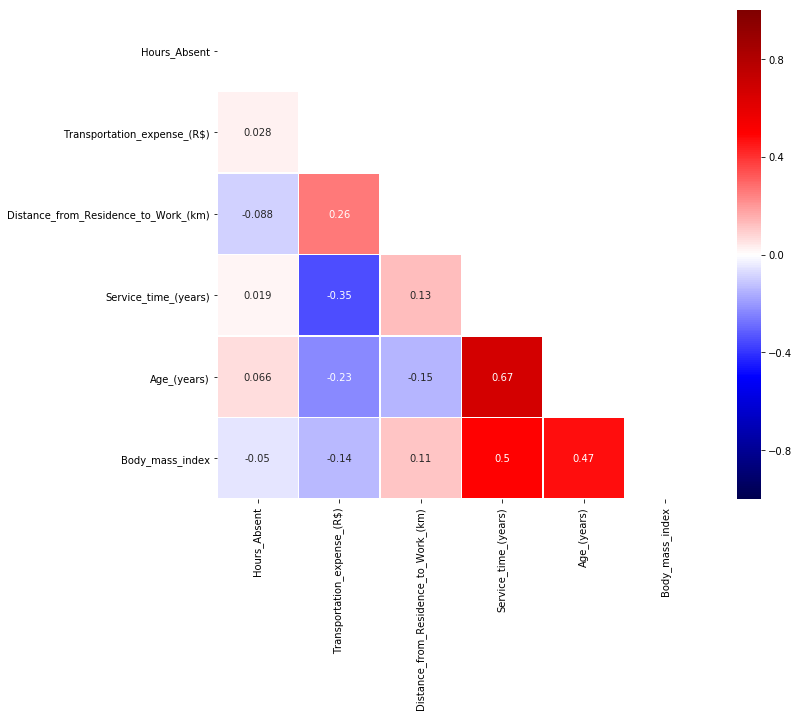

In [34]:
def plot_corr_matrix(CORR_MATRIX):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(CORR_MATRIX, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(CORR_MATRIX, mask=mask, cmap='seismic', vmax=1, center=0, vmin=-1, square=True, linewidths=.5, annot= True)

# Compute the correlation matrix
CM = abs_data[var].corr()
plot_corr_matrix( CM)

In [35]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

abs_data.Hours_Norm.values.reshape(-1,1)

array([[1.38629436],
       [0.        ],
       [0.69314718],
       [1.38629436],
       [0.69314718],
       [0.69314718],
       [2.07944154],
       [1.38629436],
       [3.68887945],
       [2.07944154],
       [2.07944154],
       [2.07944154],
       [2.07944154],
       [0.        ],
       [1.38629436],
       [2.07944154],
       [0.69314718],
       [2.07944154],
       [2.07944154],
       [0.69314718],
       [2.07944154],
       [0.        ],
       [3.68887945],
       [1.38629436],
       [2.07944154],
       [1.94591015],
       [0.        ],
       [1.38629436],
       [2.07944154],
       [0.69314718],
       [2.07944154],
       [2.07944154],
       [1.38629436],
       [2.07944154],
       [0.69314718],
       [0.        ],
       [2.07944154],
       [1.38629436],
       [2.07944154],
       [1.38629436],
       [0.69314718],
       [1.38629436],
       [1.38629436],
       [2.07944154],
       [0.69314718],
       [1.09861229],
       [1.09861229],
       [1.386

C:\Users\saraa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\saraa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


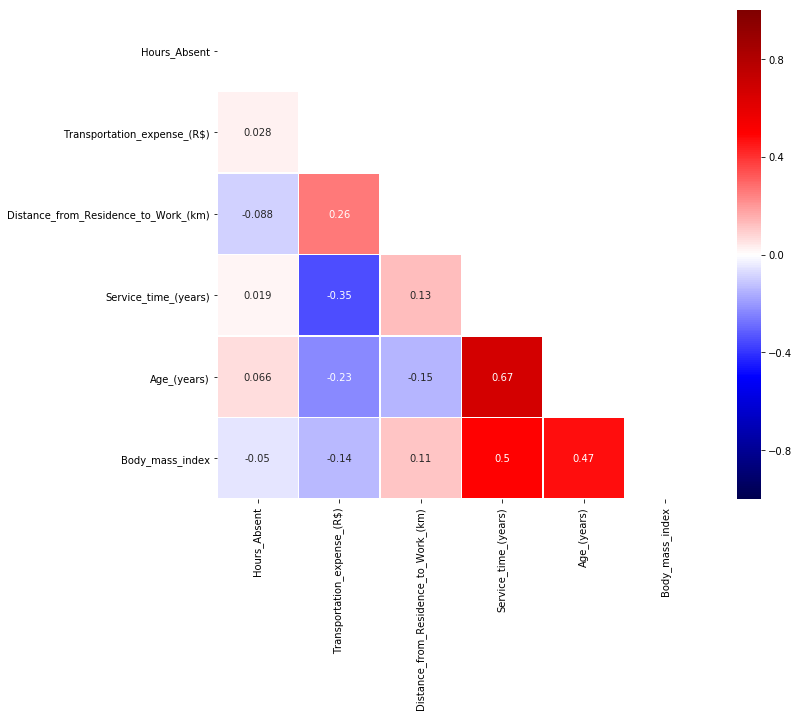

In [36]:
centered_data = scaler.fit_transform(abs_data[var].values)
df_cd = pd.DataFrame(data = centered_data, columns= abs_data[var].columns)

CM_centered = df_cd.corr()
plot_corr_matrix(CM_centered)

<h2>4.8. Comparing Differences</h2>
Comparing the mean number of hours missed in each season shows a p-value of 1.0, meaning there is little significance in the differences between the means of each season.

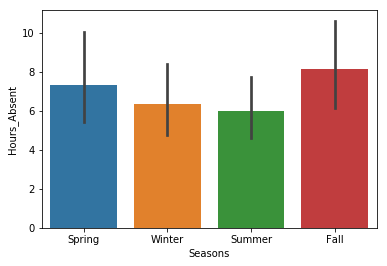

In [37]:
sns.barplot(x='Seasons', y='Hours_Absent', data=abs_data)

In [38]:
abs_data.groupby('Seasons').std()['Hours_Absent']

Seasons
Fall      15.148299
Spring    14.496215
Summer    11.059572
Winter    12.469465
Name: Hours_Absent, dtype: float64

In [39]:
a = abs_data.groupby(['Seasons','ID']).sum()['Hours_Absent'].reset_index()
dp = a.pivot(values='Hours_Absent', columns='Seasons').fillna(0)
stats.kruskal(*dp.values)

KruskalResult(statistic=16.406150975107014, pvalue=1.0)

Comparing the mean number of hours missed in each month shows a p-value of 1.0, meaning there is little significance in the differences between the means of each month.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

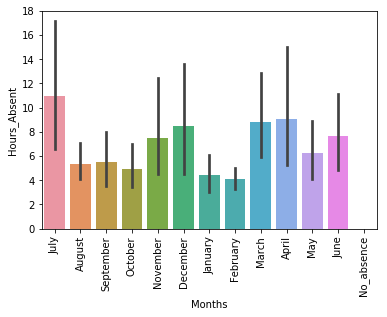

In [40]:
sns.barplot(x='Months', y='Hours_Absent', data=abs_data)
plt.xticks(x='Months', rotation='vertical')

In [41]:
abs_data.groupby('Months').mean()['Hours_Absent']

Months
April          9.094340
August         5.333333
December       8.448980
February       4.083333
January        4.440000
July          10.955224
June           7.611111
March          8.793103
May            6.250000
No_absence     0.000000
November       7.507937
October        4.915493
September      5.509434
Name: Hours_Absent, dtype: float64

In [42]:
abs_data.groupby('Months').std()['Hours_Absent']

Months
April         18.023771
August         5.749487
December      16.049482
February       3.710472
January        5.785838
July          21.546590
June          12.358507
March         16.893055
May           10.314114
No_absence     0.000000
November      16.121387
October        8.054717
September      8.407009
Name: Hours_Absent, dtype: float64

In [43]:
b = abs_data.groupby(['Months','ID']).sum()['Hours_Absent'].reset_index()
dp = b.pivot(values='Hours_Absent', columns='Months').fillna(0)
stats.kruskal(*dp.values)

KruskalResult(statistic=15.504733311516647, pvalue=1.0)

In [44]:
pd.pivot_table(abs_data, values='Hours_Absent', index='Months', columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, \
               margins_name='All')

,Hours_Absent
Months,
April,9.094340
August,5.333333
December,8.448980
February,4.083333
January,4.440000
July,10.955224
June,7.611111
March,8.793103
May,6.250000


Comparing the mean number of hours missed in each day of the week shows a p-value of 1.0, meaning there is little significance in the differences between the means of each day.

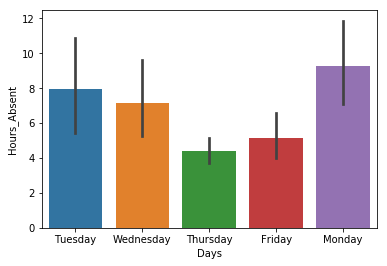

In [45]:
sns.barplot(x='Days', y='Hours_Absent', data=abs_data)

In [46]:
abs_data.groupby('Days').mean()['Hours_Absent']

Days
Friday       5.125000
Monday       9.248447
Thursday     4.424000
Tuesday      7.980519
Wednesday    7.147436
Name: Hours_Absent, dtype: float64

In [47]:
abs_data.groupby('Days').std()['Hours_Absent']

Days
Friday        7.911110
Monday       15.972645
Thursday      4.265889
Tuesday      18.027383
Wednesday    13.267863
Name: Hours_Absent, dtype: float64

In [48]:
c = abs_data.groupby(['Days','ID']).sum()['Hours_Absent'].reset_index()
dp = c.pivot(values='Hours_Absent', columns='Days').fillna(0)
stats.kruskal(*dp.values)

KruskalResult(statistic=14.068726710220458, pvalue=1.0)

In [49]:
pd.pivot_table(abs_data, values='Hours_Absent', index='Days', columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, \
               margins_name='All')

,Hours_Absent
Days,
Friday,5.125000
Monday,9.248447
Thursday,4.424000
Tuesday,7.980519
Wednesday,7.147436


Comparing the mean number of hours missed in each level of education shows a p-value of 0.99, meaning there is little significance in the differences between the means of each level of education.

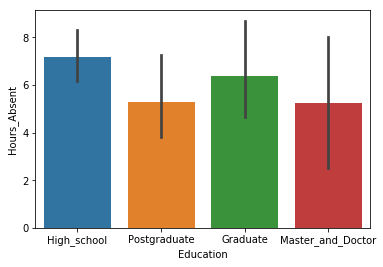

In [50]:
sns.barplot(x='Education', y='Hours_Absent', data=abs_data)

In [51]:
abs_data.groupby('Education').mean()['Hours_Absent']

Education
Graduate             6.391304
High_school          7.189853
Master_and_Doctor    5.250000
Postgraduate         5.265823
Name: Hours_Absent, dtype: float64

In [52]:
abs_data.groupby('Education').std()['Hours_Absent']

Education
Graduate              6.754351
High_school          14.258617
Master_and_Doctor     3.201562
Postgraduate          7.962587
Name: Hours_Absent, dtype: float64

In [53]:
d = abs_data.groupby(['Education','ID']).sum()['Hours_Absent'].reset_index()
dp = d.pivot(values='Hours_Absent', columns='Education').fillna(0)
stats.kruskal(*dp.values)

KruskalResult(statistic=5.771919226786296, pvalue=0.9999999980211874)

In [54]:
pd.pivot_table(abs_data, values='Hours_Absent', index='Education', columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, \
               margins_name='All')

,Hours_Absent
Education,
Graduate,6.391304
High_school,7.189853
Master_and_Doctor,5.250000
Postgraduate,5.265823


<h1>5. REGRESSION ANALYSIS</h1>

In [55]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [56]:
#Import cleaned data
abs_data = pd.read_csv('absenteeism_cleaned.csv', delimiter = ';');

To make a more robust analysis, the outliers with standard deviations of 3.5 or greater are removed.

In [57]:
#Removing outliers
def reject_outliers(abs_data):
     u = np.mean(abs_data["Hours_Norm"])
     s = np.std(abs_data["Hours_Norm"])
     data_filtered = abs_data[(abs_data["Hours_Norm"]>(u-3.5*s)) & (abs_data["Hours_Norm"]<(u+3.5*s))]
     return data_filtered

<h2>5.1. Cohen's Kappa</h2>

Cohen's Kappa can be used to measure inter-rater agreement for the different categorical items, and is a better measure than simple percent agreement because it factors in the likelihood of the agreement occurring at random. The accuracy score here is 75% with a Kappa value of 0.19, which shows that this accuracy is likely due to chance.

In [58]:
from sklearn.model_selection import GridSearchCV
logis = LogisticRegression(class_weight = "balanced")

# Split the data into a training and test set.
Xdata = abs_data.drop(['Hours_Absent','Hours_Norm'],axis = 1)
ydata = 1*(abs_data.Hours_Absent > 8)
X_train, X_test, y_train, y_test  = train_test_split(Xdata, ydata,random_state=5)

# Create an space of parameters to explore (hyper tuning)
param_grid = { "penalty": ['l1','l2'],
             'C':np.logspace(-2,1,10), 'fit_intercept':[True, False]}

# create a scorer that uses the Brier score
scorer = metrics.make_scorer(metrics.brier_score_loss)

# Find the best combination of parameters
grid = GridSearchCV(LogisticRegression(class_weight='balanced',
                    fit_intercept=True),
                    param_grid,
                    scoring=scorer, 
                    cv = 2,
                    verbose = 1,
                    n_jobs=3)
grid.fit(X_train, y_train)


clf = grid.best_estimator_

# Print the accuracy from the testing data.
print(100*accuracy_score(clf.predict(X_test), y_test))
print('Kappa',metrics.cohen_kappa_score(clf.predict(X_test), y_test))

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=3)]: Done  63 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done  75 out of  80 | elapsed:    7.1s remaining:    0.4s
[Parallel(n_jobs=3)]: Done  80 out of  80 | elapsed:    7.9s finished


75.13513513513513
Kappa 0.19792648444863337


In [59]:
coeff = pd.DataFrame( clf.coef_.T, index = X_train.columns, columns=['C'])
np.exp(coeff[coeff.C  != 0])

,C
ID,0.963217
Reason_for_absence,0.925700
Transportation_expense_(R$),1.001506
Distance_from_Residence_to_Work_(km),0.996185
Service_time_(years),1.050579
Workload_avg/day,1.004229
Hit_target,0.967518
Weight_(kg),1.012227
Height_(cm),1.028470
Body_mass_index,0.898110


<h2>5.2. Confusion Matrix</h2>
The confusion matrix can also be used to evaluate the accuracy of a classification with counts of true positives, true negatives, false positives, and false negatives.

In [60]:
M = metrics.confusion_matrix(clf.predict(X_test), y_test)
print(M)

[[129   6]
 [ 40  10]]


In [61]:
TN = str(M[0,0])
FP = str(M[0,1])
FN = str(M[1,0])
TP = str(M[1,1])

print('The number of true positives is ' + TP + '.')
print('The number of true negatives is ' + TN + '.')
print('The number of false positives is ' + FP + '.')
print('The number of false negatives is ' + FN + '.')

The number of true positives is 10.
The number of true negatives is 129.
The number of false positives is 6.
The number of false negatives is 40.


In [62]:
print(metrics.classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.76      0.96      0.85       135
          1       0.62      0.20      0.30        50

avg / total       0.73      0.75      0.70       185



<h2>5.3. Decision Tree Model</h2>
Decision trees are used to predict the value of a target variable by using a tree-like model of decisions and their consequences.

In [63]:
# Decision Tree Model
from sklearn import tree

dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))



 ---Decision Tree Model---
Decision Tree AUC = 0.69
             precision    recall  f1-score   support

          0       0.95      0.88      0.91       169
          1       0.29      0.50      0.36        16

avg / total       0.89      0.85      0.87       185



<h2>5.4 Random Forest</h2>
A random forest model uses multiple trees and output the most common categorical variable or the mean of the individual trees. Random forest corrects overfitting from decision trees.

In [64]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.61
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       169
          1       0.44      0.25      0.32        16

avg / total       0.89      0.91      0.90       185



In [65]:
y_train.value_counts(normalize = True)

0    0.915315
1    0.084685
Name: Hours_Absent, dtype: float64

In [66]:
grid_pars = dict( penalty = ['l2','l1'],
                 C = np.logspace(-3,1,100),
                 fit_intercept= [True, False],
                 class_weight=['balanced']
                 )

clf = GridSearchCV(LogisticRegression(), grid_pars, cv = 2, verbose=1, 
                   n_jobs=3, scoring= metrics.make_scorer(metrics.brier_score_loss))
clf.fit(X_train, y_train)

Fitting 2 folds for each of 400 candidates, totalling 800 fits


[Parallel(n_jobs=3)]: Done 428 tasks      | elapsed:    8.3s
[Parallel(n_jobs=3)]: Done 800 out of 800 | elapsed:   39.4s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'penalty': ['l2', 'l1'], 'C': array([1.00000e-03, 1.09750e-03, ..., 9.11163e+00, 1.00000e+01]), 'fit_intercept': [True, False], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(brier_score_loss), verbose=1)

In [67]:
print(metrics.classification_report(clf.predict(X_train),y_train))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.08      0.16       555

avg / total       1.00      0.08      0.16       555



C:\Users\saraa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


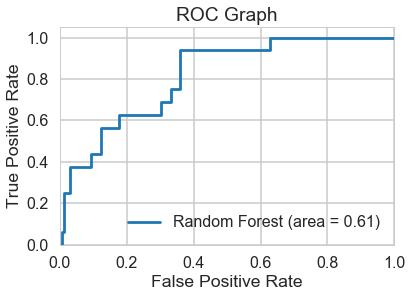

In [68]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

# Plot Random Forest ROC

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

<h2>5.5. Sensitivity, Specificty, Predictive Values</h2>

Fitting 2 folds for each of 15840 candidates, totalling 31680 fits


[Parallel(n_jobs=3)]: Done 1186 tasks      | elapsed:    2.4s
[Parallel(n_jobs=3)]: Done 11986 tasks      | elapsed:    9.9s
[Parallel(n_jobs=3)]: Done 29986 tasks      | elapsed:   23.3s
[Parallel(n_jobs=3)]: Done 31680 out of 31680 | elapsed:   24.9s finished


        5%    50%    95%
SEN  0.715  0.820  0.916
SPC  0.875  0.976  1.000
AUC  0.844  0.873  0.942
PPV  0.898  0.977  1.000
NPV  0.720  0.798  0.904


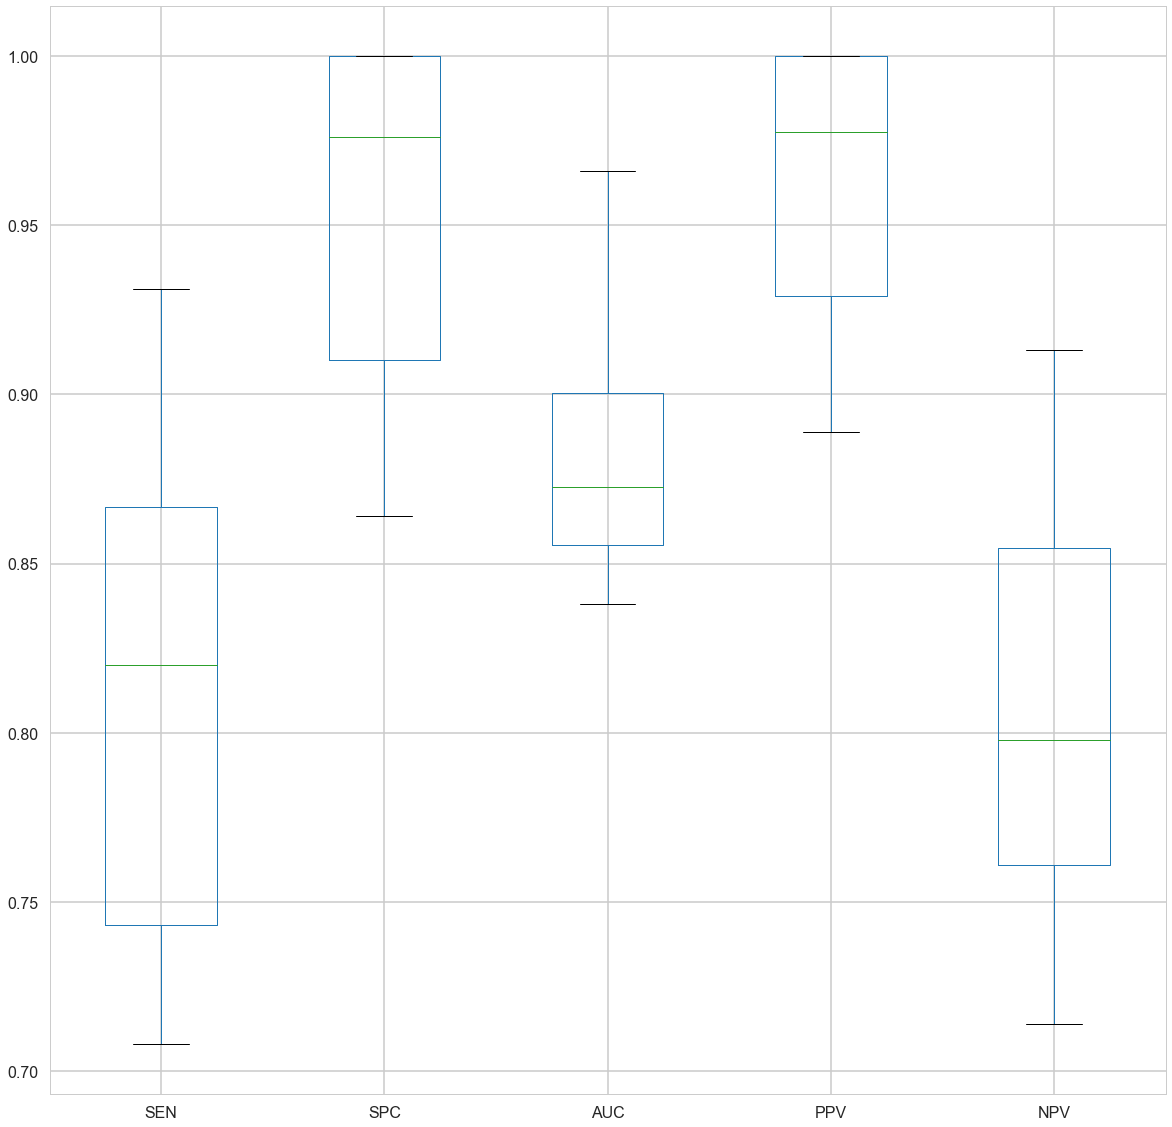

In [69]:
def my_confusion_matrix(test_prediction, true_labels):
    m = pd.crosstab(test_prediction, true_labels)
    CM = m[[1,0]].sort_index(ascending = False)
    
    CM.index=['YES_test','NO_Test']
    CM.columns=['YES_disease','NO_disease']
    
    return CM

def get_pars(test_prediction, true_labels):
    CM = my_confusion_matrix(test_prediction, true_labels)
    CM = np.array(CM)
    
    TP = CM[0,0]
    FN = CM[1,0]
    FP = CM[0,1]
    TN = CM[1,1]
    
    return TP, FN, FP, TN
 
def sensitivity(test_prediction, true_labels):
    TP, FN, _, _  =get_pars(test_prediction, true_labels)
    
    if (TP+FN) == 0:
        SEN = 0
    else:
        SEN = TP / (TP  + FN)
    
    return SEN

def specificity(test_prediction, true_labels):
    _, _, FP, TN  =get_pars(test_prediction, true_labels)
    
    if (FP  + TN) == 0:
        SPC = 0
    else:
        SPC = TN / (FP  + TN)
    
    return SPC


def positive_predictive_value(test_prediction, true_labels):
    TP, _, FP, _  =get_pars(test_prediction, true_labels)
    
    if (TP  + FP) == 0:
        PPV = 0
    else:
        PPV = TP/(TP+FP)
    
    return PPV


def negative_predictive_value(test_prediction, true_labels):
    _, FN, _, TN  =get_pars(test_prediction, true_labels)
    
    if (TN  + FN) == 0:
        NPV = 0
    else:
        NPV = TN/(TN  + FN)
    
    return NPV


def my_metrics(test_prediction, true_labels):
    y_hat, ytrue = test_prediction, true_labels
    SEN = sensitivity(y_hat, ytrue)
    SPC = specificity(y_hat, ytrue)
    PPV = positive_predictive_value(y_hat, ytrue)
    NPV = negative_predictive_value(y_hat, ytrue)
    AUC = metrics.roc_auc_score(ytrue,y_hat)
    
    return SEN, SPC, AUC, PPV, NPV


from sklearn.utils import resample

def clf_metric_bootstrap(Classifier, Predictors, Outcome, N=10):
    _metrics = pd.DataFrame(index=['SEN', 'SPC', 'AUC', 'PPV', 'NPV'])
    for i in range(N):
        Xrs, yrs = resample(Predictors, Outcome)
        _metrics[i] = my_metrics(Classifier.predict(Xrs), yrs)
    
    _metrics = _metrics.T
    
    bs_metrics= pd.DataFrame(index = _metrics.columns, 
                             columns=['5%','50%','95%'])
    
    
    bs_metrics['5%'] = _metrics.apply(lambda x: np.percentile(x,5))
    bs_metrics['50%'] = _metrics.apply(lambda x: np.percentile(x,50))
    bs_metrics['95%'] = _metrics.apply(lambda x: np.percentile(x,95))
    
    return bs_metrics.round(3), _metrics.round(3)

#%% 
# Syntethic Data
X, y= make_classification(n_samples=50, n_features=12, n_informative=2) 

# Train the model using all the data (NO train and test)
par_grid = dict( penalty = ['l2','l1'],
                 C = np.logspace(-3,1,20),
                 fit_intercept= [True, False],
                 random_state=  np.arange(1,100),
                 class_weight=[None,'balanced']
                 )


clf = GridSearchCV(LogisticRegression(), par_grid, cv = 2, verbose=1, 
                   n_jobs=3)
clf.fit(X, y)
#%% Measure Performance
clf_metrics, metric_data = clf_metric_bootstrap(clf,X,y)
print(clf_metrics)

metric_data.boxplot(figsize=(20,20))
plt.show() 

<h2>5.6. Coefficients</h2>

In [70]:
scaler = preprocessing.StandardScaler()

cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
cls.fit(X_train, y_train)
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print (coefs.sort_values(ascending = False))

Injury                         0.595017
Musculoskeletal                0.520423
Height_(cm)                    0.466445
July                           0.385321
Circulatory                    0.369512
Skin                           0.369462
Transportation_expense_(R$)    0.368707
Service_time_(years)           0.303818
Neoplasms                      0.271690
Eye                            0.222390
Age_(years)                    0.197634
August                         0.183676
Monday                         0.173965
Graduate                       0.172372
Respiratory                    0.171193
Seasons                        0.161667
Genitourinary                  0.161466
Summer                         0.158784
No_Disciplinary_failure        0.152337
Thursday                       0.144823
Weight_(kg)                    0.125083
Month_of_absence               0.114362
Social drinker                 0.105791
Drinker                        0.105791
December                       0.099362


<h1>6. CONCLUSIONS</h1>
Regression analyses showed that injury and musculoskeletal issues are the likeliest predictors of an employee missing 8 or more hours of work. Given the nature of courier work, one could expect courier employees to miss work due to these issues, though it is possible that chance plays a role in making these two issues the biggest.

<h1>7. RECOMMENDATIONS FOR CLIENTS</h1>
Even if injuries and musculoskeletal issues being the biggest reasons for missing work is due to chance, steps can be taken to reduce the likelihood of employees getting injuries or musculoskeletal issues. Employers can issue guidelines to minimize the risk of injuries such as limits on what one person can carry at once and also minimize ergonomic hazards. Employees can exercise, stretch and make sure to get enough sleep to lower their chances of getting hurt. Public health officials can make the general public more aware of injuries on the job.

<h1>8. OTHER DATA SETS</h1>
Courier is one type of industry, and this is one specific company, so data with the same factors from other courier companies and from other industries such as hospitality and tourism, agriculture, manufacturing, scientific research, and government employment would help to see if the industries have similar causes of workplace absenteeism, and also for public officials to more effectively target different industries in a large, diverse economy. Also, data from a longer time frame than just the 3 years in this data set could give more useful information.